In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
df=pd.read_csv('heart_attack_dataset.csv')
df.head(4)

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)


#to drop some column or line df.drop(['gender',..],axis=1) to delete gender for lines ['0',...] and axis=0
#to know the size of your table use df.size
#to know the name of colums df.column
#data.describe() give mean,min,......

In [3]:
di=df.drop(['Cholesterol (mg/dL)','Chest Pain Type','Treatment'], axis=1)
di

,Gender,Age,Blood Pressure (mmHg),Has Diabetes,Smoking Status
0,Male,70,181,No,Never
1,Female,55,103,Yes,Never
2,Male,42,95,Yes,Current
3,Male,84,106,No,Never
4,Male,86,187,Yes,Current
...,...,...,...,...,...
995,Male,42,125,Yes,Current
996,Male,80,186,Yes,Never
997,Female,64,108,Yes,Current
998,Female,84,123,No,Current


In [4]:
di.describe()

,Age,Blood Pressure (mmHg)
count,1000.000000,1000.000000
mean,60.338000,145.440000
std,17.317496,31.756525
min,30.000000,90.000000
25%,45.000000,118.000000
50%,60.500000,146.000000
75%,76.000000,173.000000
max,89.000000,199.000000


In [5]:
# here we have not a nan value but if it is the case we can use df.fillna(df['Age'].mean) for replace with the mean 
#df.dropna(axis=0) to delete lines with nan values 

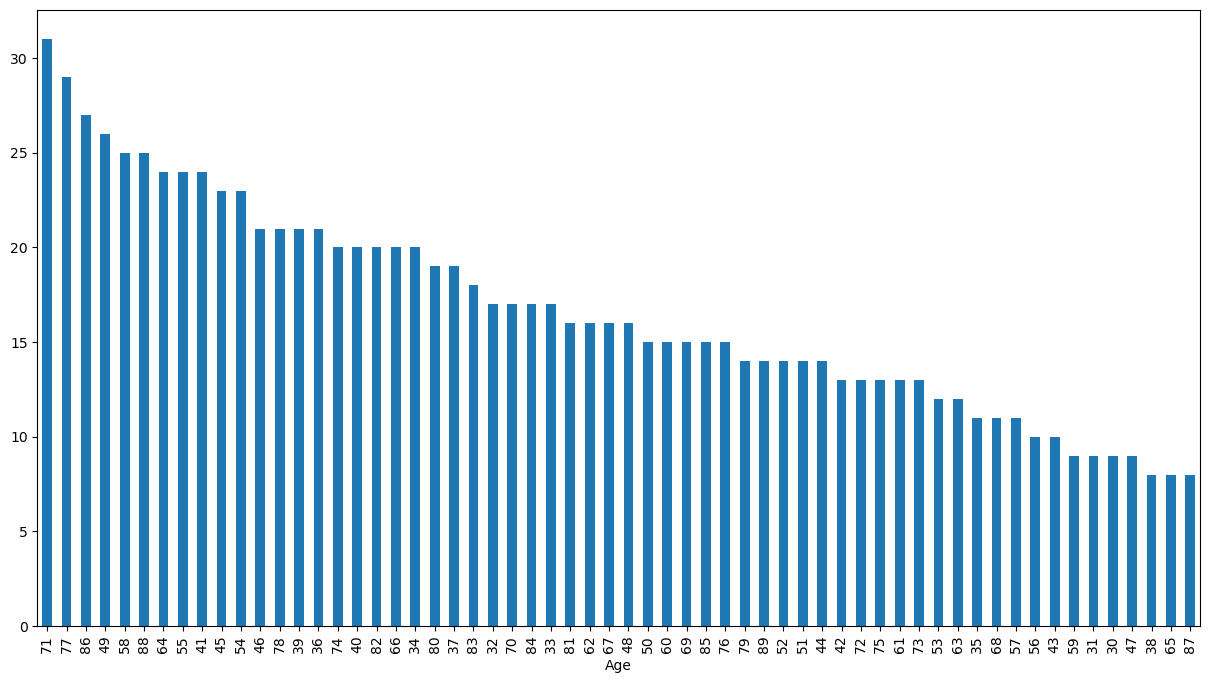

In [6]:
plt.figure(figsize=(15,8))

a=df['Age'].value_counts().plot.bar()




In [7]:
#groupby() : grouping samples through the some feature 
di.groupby(['Gender','Has Diabetes','Smoking Status']).mean()

Age  Blood Pressure (mmHg)
Gender Has Diabetes Smoking Status                                  
Female No           Current         60.795455             144.318182
                    Former          62.073529             149.000000
                    Never           60.578313             141.289157
       Yes          Current         59.400000             150.200000
                    Former          59.653061             145.183673
                    Never           61.102273             141.659091
Male   No           Current         58.000000             145.118421
                    Former          60.565789             147.486842
                    Never           59.532609             149.032609
       Yes          Current         60.039474             141.197368
                    Former          62.456790             149.333333
                    Never           60.191011             142.067416

### Dict['key'] =valeur
$\vspace{2cm}$
 
 
### the table pandas is a sum of series(column) that we add an index we change that index(which the role is to be a key object for the defferent value of the séries 


##### function iloc[: , : ]on peut faire de l'indexing comme numpyt 
##### d[d['age']] <70    boolean indexing  section of the samples with ages lower than 70
##### d['age'] <70 mask 
##### d[['age','blood pressure']] that's a dataframe 
##### function loc tha same thing like iloc function but we work with iloc[0:2, 'age',...........]

In [8]:

c_2=di[(di['Age']<80) & (di['Age']>70)]


In [9]:
c_3=di[di['Age']>80]
c_1=di[di['Age']<70]

In [10]:
c_1.describe()

,Age,Blood Pressure (mmHg)
count,635.000000,635.000000
mean,49.406299,144.943307
std,11.199311,31.619384
min,30.000000,90.000000
25%,40.000000,118.000000
50%,49.000000,145.000000
75%,58.500000,172.000000
max,69.000000,199.000000


In [11]:
c_2.describe()

,Age,Blood Pressure (mmHg)
count,169.000000,169.000000
mean,74.899408,145.763314
std,2.702831,32.028683
min,71.000000,90.000000
25%,72.000000,117.000000
50%,75.000000,143.000000
75%,77.000000,171.000000
max,79.000000,199.000000


In [12]:
c_3.describe()

,Age,Blood Pressure (mmHg)
count,160.000000,160.000000
mean,84.981250,144.837500
std,2.548824,32.055158
min,81.000000,91.000000
25%,83.000000,119.750000
50%,85.000000,142.500000
75%,87.000000,171.500000
max,89.000000,199.000000


In [13]:
#pour classer les echantillons 
di.loc[di['Age']<70,'Age']= 0
di.loc[(di['Age']>=70) & (di['Age']<80),'Age']=1
di.loc[(di['Age']>=80), 'Age'] = 2
di['Age'].value_counts()

Age
0    635
1    186
2    179
Name: count, dtype: int64

In [14]:
# know it is simple to work with this classification 

In [15]:
# la fonction map map(lambda x : f(x))

In [16]:
def category(Age) :
    if Age<70 :
        return '<70'
    elif Age>=70 and age<80 :
        return '70<=age<80'
    elif Age>=80 :
        return '>=80'

## transformer les variable qualitatives en quantitatives pour faire de statistique

In [17]:
di['Age'].map(category)

0      <70
1      <70
2      <70
3      <70
4      <70
      ... 
995    <70
996    <70
997    <70
998    <70
999    <70
Name: Age, Length: 1000, dtype: object

In [18]:
#pourquoi on peut pas faire ça avec de booleen indexing pa-ce-qu'il travaille sumiltanément 
#dans la première command on va changer certain ligne à des strings mais dnas la deuxieme command le program
 #va pas arriver à comparer des string avec des int ou des float 

In [19]:
#il ya aussi la fonction apply qui peut faire la même chose mais sur toute la dataframe 

In [20]:
b=di['Gender'].map({'Male':0, 'Female':1})

In [21]:
b.mean()

0.51

In [22]:
di['Gender'].replace( ['Male','Female'], [0, 1]) # donne la même chose que map 

0      0
1      1
2      0
3      0
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Gender, Length: 1000, dtype: int64

In [23]:
di['Gender'] # on remarque que le gender et de type object 

0        Male
1      Female
2        Male
3        Male
4        Male
        ...  
995      Male
996      Male
997    Female
998    Female
999      Male
Name: Gender, Length: 1000, dtype: object

In [24]:
di['Gender'].astype('category').cat.codes  # ça va automatiquement associé chaque category par un nombre, et c'est pourquoi la 
#cette methode et plus interessante 

0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    1
997    0
998    0
999    1
Length: 1000, dtype: int8

In [25]:
di['Age']<80

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: Age, Length: 1000, dtype: bool

Text(0.5, 1.0, 'relation between "has diabetes and Smoking Status" ')

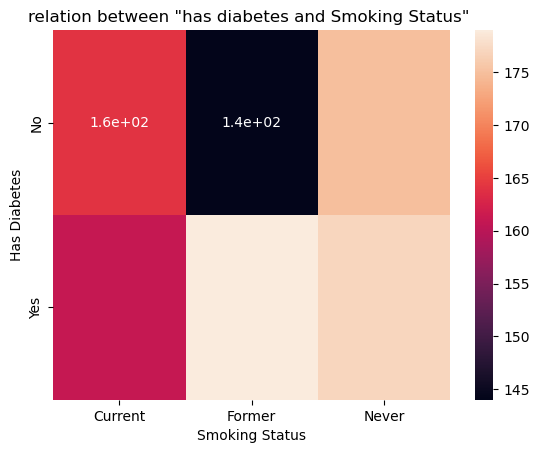

In [43]:
cross_tab=pd.crosstab(di['Has Diabetes'],di['Smoking Status'])
sns.heatmap(cross_tab,annot=True)
plt.title('relation between "has diabetes and Smoking Status" ')

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


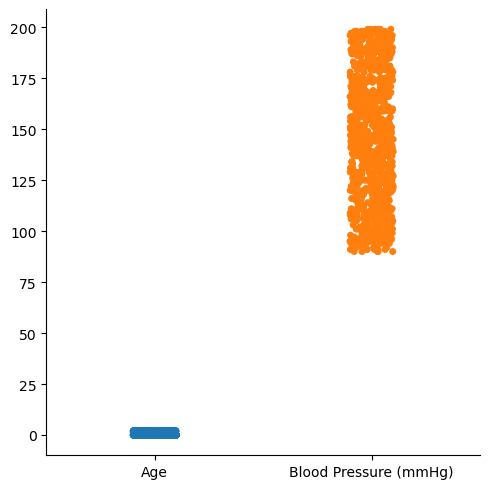

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(di['Has Diabetes'],di['Smoking Status'])

              precision    recall  f1-score   support

     Current       0.30      0.47      0.37        93
      Former       0.36      0.54      0.43       101
       Never       0.00      0.00      0.00       106

    accuracy                           0.33       300
   macro avg       0.22      0.34      0.27       300
weighted avg       0.21      0.33      0.26       300



C:\Users\XPRISTO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\XPRISTO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\XPRISTO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz